In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline


count = pd.read_csv('C:/Users/slee776/Downloads/TrainInitCountSummary.csv')

In [10]:
prpt = pd.read_csv('C:/Users/slee776/Downloads/TrainInfoSummary.csv')

In [54]:
sample = pd.read_csv('C:/Users/slee776/Downloads/result.csv')
sample = sample.dropna()

In [7]:
count.head()

,db_index,count
0,0,5445773
1,1,5388671
2,2,5363692
3,3,5511291
4,4,5452589


In [11]:
prpt.head()

,db_index,num_vertex,num_edge,average_degree,density
0,0,21332,3179505,149.048612,0.013975
1,1,15839,2354773,148.669297,0.018774
2,2,11466,1704644,148.669458,0.025934
3,3,89461,13350689,149.234739,0.003336
4,4,27478,4095071,149.030897,0.010848


In [15]:
sample.head()

,db_index,method,ratio,result,time,sampling time
0,0.0,randomEdge,0.1,5534.0,9.62,0.04
1,0.0,randomWalk,0.1,863.0,7.23,8.20
3,0.0,randomEdge,0.2,44127.0,9.63,0.04
4,0.0,randomWalk,0.2,3915.0,14.51,9.15
5,0.0,random,0.3,1199.0,9.66,0.12


In [120]:
result_random = sample.loc[sample["method"]=="random",]

In [121]:
result_randomEdge = sample.loc[sample["method"]=="randomEdge",]
result_randomWalk = sample.loc[sample["method"]=="randomWalk",]

In [122]:
result_random = result_random.join(count.set_index('db_index'), on='db_index')
result_randomEdge = result_randomEdge.join(count.set_index('db_index'), on='db_index')
result_randomWalk = result_randomWalk.join(count.set_index('db_index'), on='db_index')

In [123]:
result_random["result_ratio"] = result_random["result"]/result_random["count"]
result_randomEdge["result_ratio"] = result_randomEdge["result"]/result_randomEdge["count"]
result_randomWalk["result_ratio"] = result_randomWalk["result"]/result_randomWalk["count"]

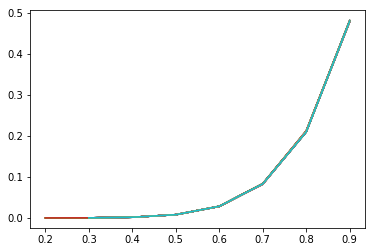

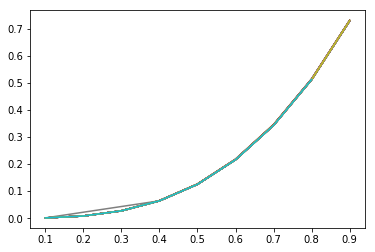

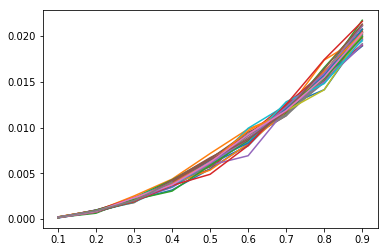

In [127]:
plt.figure(figsize = (6,4))
for i in xrange(40) :
    plt.plot(result_random.loc[result_random['db_index']==i,'ratio'],result_random.loc[result_random['db_index']==i,'result_ratio'])

plt.figure(figsize = (6,4))
for i in xrange(40) :
    plt.plot(result_randomEdge.loc[result_randomEdge['db_index']==i,'ratio'],result_randomEdge.loc[result_randomEdge['db_index']==i,'result_ratio'])

plt.figure(figsize = (6,4))
for i in xrange(40) :
    plt.plot(result_randomWalk.loc[result_randomWalk['db_index']==i,'ratio'],result_randomWalk.loc[result_randomWalk['db_index']==i,'result_ratio'])

In [132]:
for ratio in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] :
    #ratio = r*0.1
    #print ratio
    #print result_random.loc[result_random['ratio']==ratio,'result_ratio']
    ss = result_random.loc[result_random['ratio']==ratio,'result_ratio']
    #print ss
    print("Ratio : %.1f Mean : %.6f Stv : %.4f // %.6f" %(ratio, ss.mean(skipna=True), ss.std(), ratio**3))
    #print(ss.stdev())

Ratio : 0.1 Mean : nan Stv : nan // 0.001000
Ratio : 0.2 Mean : 0.000013 Stv : 0.0000 // 0.008000
Ratio : 0.3 Mean : 0.000220 Stv : 0.0000 // 0.027000
Ratio : 0.4 Mean : 0.001651 Stv : 0.0000 // 0.064000
Ratio : 0.5 Mean : 0.007873 Stv : 0.0001 // 0.125000
Ratio : 0.6 Mean : 0.028131 Stv : 0.0002 // 0.216000
Ratio : 0.7 Mean : 0.082611 Stv : 0.0004 // 0.343000
Ratio : 0.8 Mean : 0.210197 Stv : 0.0008 // 0.512000
Ratio : 0.9 Mean : 0.478929 Stv : 0.0009 // 0.729000


In [128]:
for ratio in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] :
    ss = result_randomEdge.loc[result_randomEdge['ratio']==ratio,'result_ratio']
    print("Ratio : %.1f Mean : %.06f Stv : %.04f" %(ratio, ss.mean(skipna=True), ss.std()))


Ratio : 0.1 Mean : 0.001005 Stv : 0.0000
Ratio : 0.2 Mean : 0.008066 Stv : 0.0001
Ratio : 0.3 Mean : 0.027148 Stv : 0.0002
Ratio : 0.4 Mean : 0.064267 Stv : 0.0003
Ratio : 0.5 Mean : 0.125442 Stv : 0.0004
Ratio : 0.6 Mean : 0.216677 Stv : 0.0006
Ratio : 0.7 Mean : 0.343809 Stv : 0.0008
Ratio : 0.8 Mean : 0.512689 Stv : 0.0009
Ratio : 0.9 Mean : 0.729691 Stv : 0.0006


In [129]:
for ratio in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] :
    ss = result_randomWalk.loc[result_randomWalk['ratio']==ratio,'result_ratio']
    print("Ratio : %.1f Mean : %.06f Stv : %.04f" %(ratio, ss.mean(skipna=True), ss.std()))


Ratio : 0.1 Mean : 0.000169 Stv : 0.0000
Ratio : 0.2 Mean : 0.000845 Stv : 0.0001
Ratio : 0.3 Mean : 0.002069 Stv : 0.0002
Ratio : 0.4 Mean : 0.003836 Stv : 0.0003
Ratio : 0.5 Mean : 0.006072 Stv : 0.0004
Ratio : 0.6 Mean : 0.008843 Stv : 0.0006
Ratio : 0.7 Mean : 0.012081 Stv : 0.0004
Ratio : 0.8 Mean : 0.015628 Stv : 0.0007
Ratio : 0.9 Mean : 0.020249 Stv : 0.0008
